<a href="https://colab.research.google.com/github/gkarthick510/Project/blob/main/cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def get_output_image(original_image_path: str, fully_annotated_image_path: str,
partially_annotated_image_path: str):

    # Load the original image.
    original_image = cv2.imread(original_image_path)
    cv2_imshow(original_image)
    # Load the fully annotated image.
    fully_annotated_image = cv2.imread(fully_annotated_image_path)
  

    # Convert the fully annotated image to grayscale.
    fully_annotated_image_gray = cv2.cvtColor(fully_annotated_image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(fully_annotated_image_gray)

    # Threshold the fully annotated image to create a binary image.
    threshold = 127
    fully_annotated_image_binary = cv2.threshold(fully_annotated_image_gray, threshold, 255, cv2.THRESH_BINARY)[1]

    # Find the contours in the binary image.
    contours, hierarchy = cv2.findContours(fully_annotated_image_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour.
    largest_contour = max(contours, key=cv2.contourArea)

    # Extract the bounding box of the largest contour.
    bounding_box = cv2.boundingRect(largest_contour)
    
    # Crop the original image to remove the annotated region.
    partially_annotated_image=cv2.imread(partially_annotated_image_path)
    
    partially_annotated_image = partially_annotated_image[bounding_box[1]:bounding_box[1] + bounding_box[3],
                                            bounding_box[0]:bounding_box[0] + bounding_box[2]]
    cv2_imshow(partially_annotated_image)
    # Save the partially annotated image.
    cv2.imwrite(partially_annotated_image_path, partially_annotated_image)
  

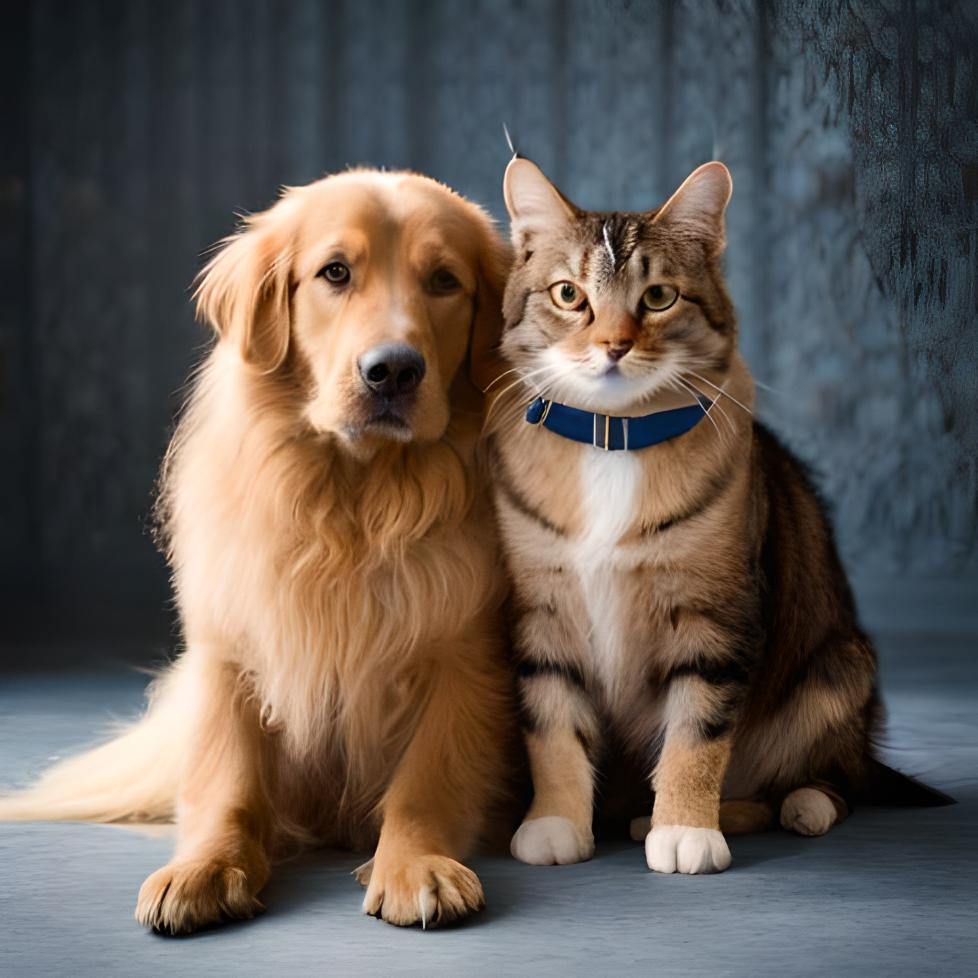

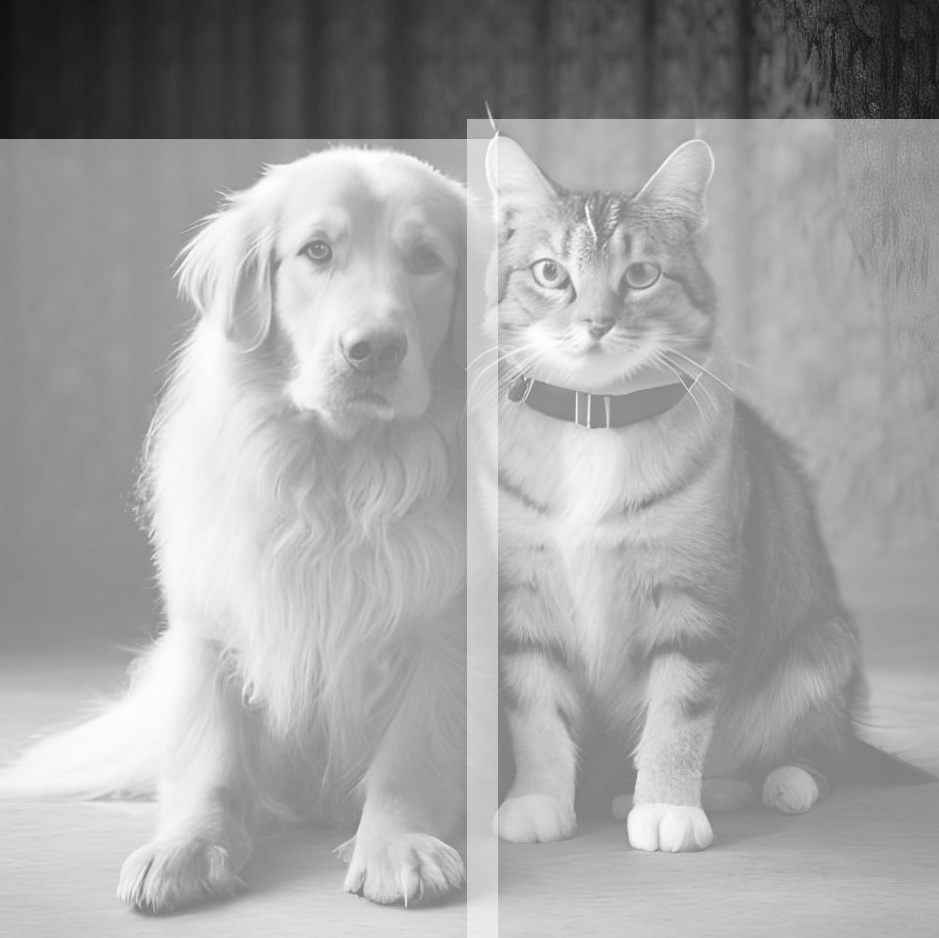

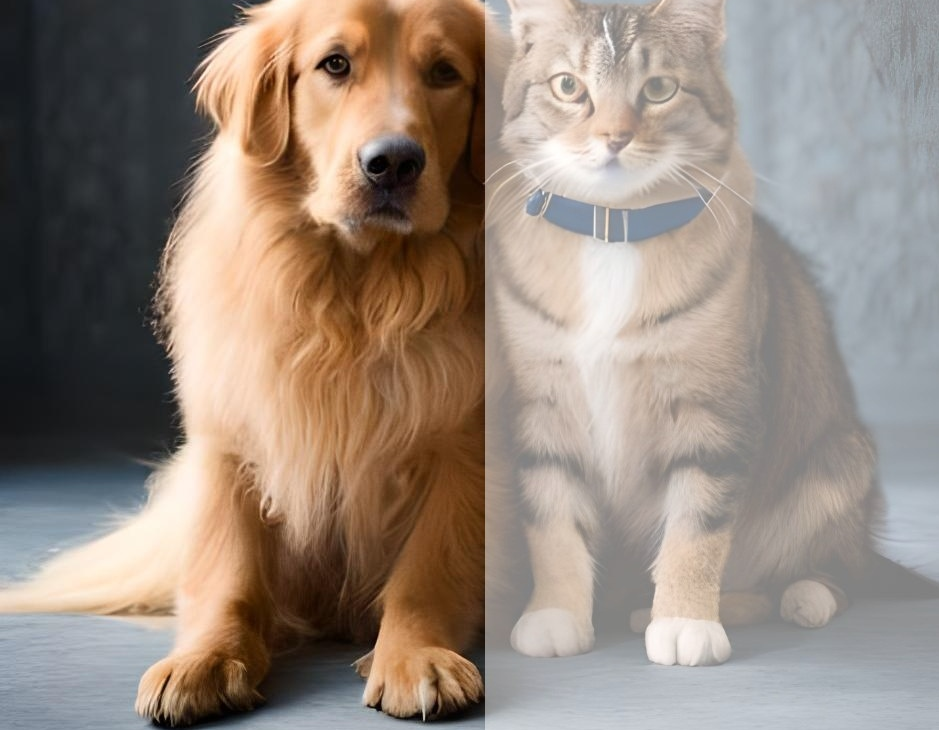

In [11]:
get_output_image("/content/original_image.jpg","/content/fully_annotated_image.jpg","/content/OUTPUT_partially_annotated_image(1).jpg")